In [1]:
# 경고 메시지가 안나오게..

import warnings
warnings.filterwarnings('ignore')


# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# KFold
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 데이터 전처리
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 평가함수
from sklearn.metrics import accuracy_score

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

# 교차검증 함수
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

#군집
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift

# 차원축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 저장
import pickle

# 그래프 설정
plt.rcParams['font.family']= 'Malgun Gothic'
# plt.rcParams['font.family']= 'AppleGothic'
plt.rcParams['font.size']  = 16
plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams['axes.unicode_minus'] = False


## 데이터 준비

In [2]:
df1 = pd.read_excel('data/dataset2017.xlsx', sheet_name='Sheet1')
df1.head()


,h12_id,h12_ind,h12_sn,h12_merkey,h_new,h12_cobf,p12_wgl,p12_wsl,p12_wgc,p12_wsc,...,da12_326,da12_327,da12_328,da12_6aq14,da12_6aq15,h12_pers_income1,h12_pers_income2,h12_pers_income3,h12_pers_income4,h12_pers_income5
0,1,1,1,10101,0,NaN,953.482054,0.286943,948.140524,0.285336,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,2,1,1,20101,0,NaN,1238.891352,0.372835,1238.891352,0.372835,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,3,1,1,30101,0,NaN,1282.051947,0.385824,1282.051947,0.385824,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,4,1,1,40101,0,NaN,1066.327201,0.320903,1066.327201,0.320903,...,NaN,NaN,NaN,NaN,NaN,NaN,3418.0,NaN,0,NaN
4,4,1,1,40101,0,NaN,1390.617192,0.418496,1382.826774,0.416151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [3]:
df_all = df1[['h12_g3', 'h12_g4', 'h12_g10', 'h12_g11', 'h12_eco9',
                'p1202_8aq1', 'h12_reg7']]
df_all.head()


,h12_g3,h12_g4,h12_g10,h12_g11,h12_eco9,p1202_8aq1,h12_reg7
0,2,1936,2,2,NaN,NaN,1
1,2,1945,2,2,NaN,NaN,1
2,1,1948,2,2,NaN,NaN,1
3,1,1942,3,1,762.0,108.9,1
4,2,1923,2,1,NaN,NaN,1


In [4]:
a1 = ['성별', '출생년도', '혼인상태', '종교유무', '직종', 
      '평균임금', '지역']
df_all.columns = a1
df_all.head()

,성별,출생년도,혼인상태,종교유무,직종,평균임금,지역
0,2,1936,2,2,NaN,NaN,1
1,2,1945,2,2,NaN,NaN,1
2,1,1948,2,2,NaN,NaN,1
3,1,1942,3,1,762.0,108.9,1
4,2,1923,2,1,NaN,NaN,1


## 데이터 전처리

In [5]:
# 결과데이터를 제외한 모든 컬럼의 결측치를 모름/무응답으로 변경한다.
df_all['성별'].fillna(9,inplace=True)
df_all['출생년도'].fillna(9999,inplace=True)
df_all['혼인상태'].fillna(9,inplace=True)
df_all['종교유무'].fillna(9,inplace=True)
df_all['직종'].fillna(9999, inplace=True)

df_all.isna().sum()

성별          0
출생년도        0
혼인상태        0
종교유무        0
직종          0
평균임금    10915
지역          0
dtype: int64

In [6]:
# df_all.drop(['혼인상태', '종교유무', '지역'], axis=1, inplace=True)
# df_all


,성별,출생년도,직종,평균임금
0,2,1936,9999.0,NaN
1,2,1945,9999.0,NaN
2,1,1948,9999.0,NaN
3,1,1942,762.0,108.9
4,2,1923,9999.0,NaN
...,...,...,...,...
15417,2,1967,952.0,NaN
15418,2,1992,9999.0,NaN
15419,1,1995,521.0,72.0
15420,2,1998,432.0,NaN


In [7]:
# 평균 임금이 결측치인 사람과 그렇지 않은 사람으로 나눈다.
idx1= df_all.query('평균임금 == "NaN"').index
# idx = df_all['평균임금'].isna()
# test_df = df_all[idx1]
test_df = df_all.iloc[idx1]

idx2= df_all.query('평균임금 != "NaN"').index
# idx2= df_all['평균임금'].notna()
train_df = df_all.iloc[idx2]
# train_df = df_all[idx2]


display( train_df.head())
display( test_df.head())

,성별,출생년도,직종,평균임금
3,1,1942,762.0,108.9
10,2,1940,999.0,20.0
16,1,1978,312.0,322.0
17,2,1975,254.0,120.0
24,1,1975,286.0,300.0


,성별,출생년도,직종,평균임금
0,2,1936,9999.0,NaN
1,2,1945,9999.0,NaN
2,1,1948,9999.0,NaN
4,2,1923,9999.0,NaN
5,1,1962,530.0,NaN


In [8]:
# 학습용 데이터를 입력과 결과로 나눈다.
x = train_df.drop('평균임금', axis=1)
y = train_df['평균임금']

display(x)
display(y)

,성별,출생년도,직종
3,1,1942,762.0
10,2,1940,999.0
16,1,1978,312.0
17,2,1975,254.0
24,1,1975,286.0
...,...,...,...
15400,1,1966,874.0
15401,2,1962,899.0
15404,2,1993,411.0
15412,1,1956,854.0


3        108.9
10        20.0
16       322.0
17       120.0
24       300.0
         ...  
15400    230.0
15401    138.0
15404    286.0
15412    179.0
15419     72.0
Name: 평균임금, Length: 4507, dtype: float64

In [9]:
# 표준화
scaler1 = StandardScaler()
scaler1.fit(x)
x = scaler1.transform(x)
x

array([[-0.95465468, -2.0131285 ,  0.66435585],
       [ 1.04749918, -2.15425839,  1.47219531],
       [-0.95465468,  0.52720954, -0.86951653],
       ...,
       [ 1.04749918,  1.58568373, -0.53206461],
       [-0.95465468, -1.02521926,  0.97794754],
       [-0.95465468,  1.72681362, -0.15711802]])

## 모델 선정

In [10]:
# KFold 생성 : 교차 검증을 위해 데이터 구성을 하는 작업
fold1 = KFold(n_splits=10, shuffle=True, random_state=1)

In [11]:
# KNN
params = {
    'n_neighbors' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11,12,13,14,15,16,17,18,19,20]
}

model1 = KNeighborsRegressor()
grid1 = GridSearchCV(model1, param_grid=params, scoring='r2', cv=fold1)
grid1.fit(x, y)
print(f'최적의 하이퍼 파라미터 : {grid1.best_params_}')
print(f'최적의 모델 평균 성능 : {grid1.best_score_}')


최적의 하이퍼 파라미터 : {'n_neighbors': 20}
최적의 모델 평균 성능 : 0.43389919430186863


In [12]:
# Ridge
params = {
    # 값이 낮으면 규제가 약해지고 값이 크면 규제가 강해진다
    'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 1000]
}

model3 = Ridge()
grid3 = GridSearchCV(model3, param_grid=params, scoring='r2', cv=fold1)
grid3.fit(x, y)
print(f'최적의 하이퍼 파라미터 : {grid3.best_params_}')
print(f'최적의 모델 평균 성능 : {grid3.best_score_}')


최적의 하이퍼 파라미터 : {'alpha': 100}
최적의 모델 평균 성능 : 0.285627353791398


In [13]:
# Lasso
params = {
    # 값이 낮으면 규제가 약해지고 값이 크면 규제가 강해진다
    'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 1000]
}

model4 = Lasso()
grid4 = GridSearchCV(model4, param_grid=params, scoring='r2', cv=fold1)
grid4.fit(x, y)
print(f'최적의 하이퍼 파라미터 : {grid4.best_params_}')
print(f'최적의 모델 평균 성능 : {grid4.best_score_}')


최적의 하이퍼 파라미터 : {'alpha': 1}
최적의 모델 평균 성능 : 0.2855128226582501


In [14]:
# ElasticNet
params = {
    # 값이 낮으면 규제가 약해지고 값이 크면 규제가 강해진다
    'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 1000]
}

model5 = ElasticNet()
grid5 = GridSearchCV(model5, param_grid=params, scoring='r2', cv=fold1)
grid5.fit(x, y)
print(f'최적의 하이퍼 파라미터 : {grid5.best_params_}')
print(f'최적의 모델 평균 성능 : {grid5.best_score_}')


최적의 하이퍼 파라미터 : {'alpha': 0.01}
최적의 모델 평균 성능 : 0.28548535838593503


In [15]:
# SVR
params = {
        # 값이 크면 규제가 약해지고, 값이 작으면 규제가 강해진다.
            'C' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
        }

model6 = SVR()
grid6 = GridSearchCV(model6, param_grid=params, scoring='r2', cv=fold1)
grid6.fit(x, y)
print(f'최적의 하이퍼 파라미터 : {grid6.best_params_}')
print(f'최적의 모델 평균 성능 : {grid6.best_score_}')


최적의 하이퍼 파라미터 : {'C': 100}
최적의 모델 평균 성능 : 0.40716543421462176


In [16]:
# 결정트리
params = {
        # 질문 깊이
    'max_depth' : [None, 1,2,3,4,5,6,7,8,9,10]
        }

model7 = DecisionTreeRegressor()
grid7 = GridSearchCV(model7, param_grid=params, scoring='r2', cv=fold1)
grid7.fit(x, y)
print(f'최적의 하이퍼 파라미터 : {grid7.best_params_}')
print(f'최적의 모델 평균 성능 : {grid7.best_score_}')


최적의 하이퍼 파라미터 : {'max_depth': 7}
최적의 모델 평균 성능 : 0.4416600011037512


In [17]:
# 랜덤포레스트
params = {
    # 트리의 개수
    'n_estimators':[10,50,100,150,200],
    # 질문 깊이
    'max_depth' : [None, 1,2,3,4,5,6,7,8,9,10]
}

model8 = RandomForestRegressor()
grid8 = GridSearchCV(model8, param_grid=params, scoring='r2', cv=fold1)
grid8.fit(x, y)
print(f'최적의 하이퍼 파라미터 : {grid8.best_params_}')
print(f'최적의 모델 평균 성능 : {grid8.best_score_}')

최적의 하이퍼 파라미터 : {'max_depth': 8, 'n_estimators': 200}
최적의 모델 평균 성능 : 0.48738823693902544


In [18]:
params = {
    # 트리의 개수
    'n_estimators':[10,50,100,150,200, 250, 300, 350, 400],
    # 질문 깊이
    'max_depth' : [None, 1,2,3,4,5,6,7,8,9,10]
}

model9 = GradientBoostingRegressor()
grid9 = GridSearchCV(model9, param_grid=params, scoring='r2', cv=fold1)
grid9.fit(x, y)
print(f'최적의 하이퍼 파라미터 : {grid9.best_params_}')
print(f'최적의 모델 평균 성능 : {grid9.best_score_}')

최적의 하이퍼 파라미터 : {'max_depth': 3, 'n_estimators': 350}
최적의 모델 평균 성능 : 0.5083748110952715


In [19]:
params = {
    # 트리의 개수
    'n_estimators':[10,50,100,150,200],
    # 질문 깊이
    'max_depth' : [None, 1,2,3,4,5,6,7,8,9,10]
}

model10 = XGBRegressor(silent=True, verbosity=0, tree_method= 'gpu_hist')
grid10 = GridSearchCV(model10, param_grid=params, scoring='r2', cv=fold1)
grid10.fit(x, y)
print(f'최적의 하이퍼 파라미터 : {grid10.best_params_}')
print(f'최적의 모델 평균 성능 : {grid10.best_score_}')

최적의 하이퍼 파라미터 : {'max_depth': 3, 'n_estimators': 50}
최적의 모델 평균 성능 : 0.5020721242974016


In [20]:
best1 = grid1.best_estimator_
best2 = LinearRegression()
best3 = grid3.best_estimator_
best4 = grid4.best_estimator_
best5 = grid5.best_estimator_
best6 = grid6.best_estimator_
best7 = grid7.best_estimator_
best8 = grid8.best_estimator_
best9 = grid9.best_estimator_
best10 = grid10.best_estimator_

In [21]:
# 교차 검증
r1 = cross_val_score(best1, x, y, scoring='r2', cv=fold1)
r2 = cross_val_score(best2, x, y, scoring='r2', cv=fold1)
r3 = cross_val_score(best3, x, y, scoring='r2', cv=fold1)
r4 = cross_val_score(best4, x, y, scoring='r2', cv=fold1)
r5 = cross_val_score(best5, x, y, scoring='r2', cv=fold1)
r6 = cross_val_score(best6, x, y, scoring='r2', cv=fold1)
r7 = cross_val_score(best7, x, y, scoring='r2', cv=fold1)
r8 = cross_val_score(best8, x, y, scoring='r2', cv=fold1)
r9 = cross_val_score(best9, x, y, scoring='r2', cv=fold1)
r10 = cross_val_score(best10, x, y, scoring='r2', cv=fold1)


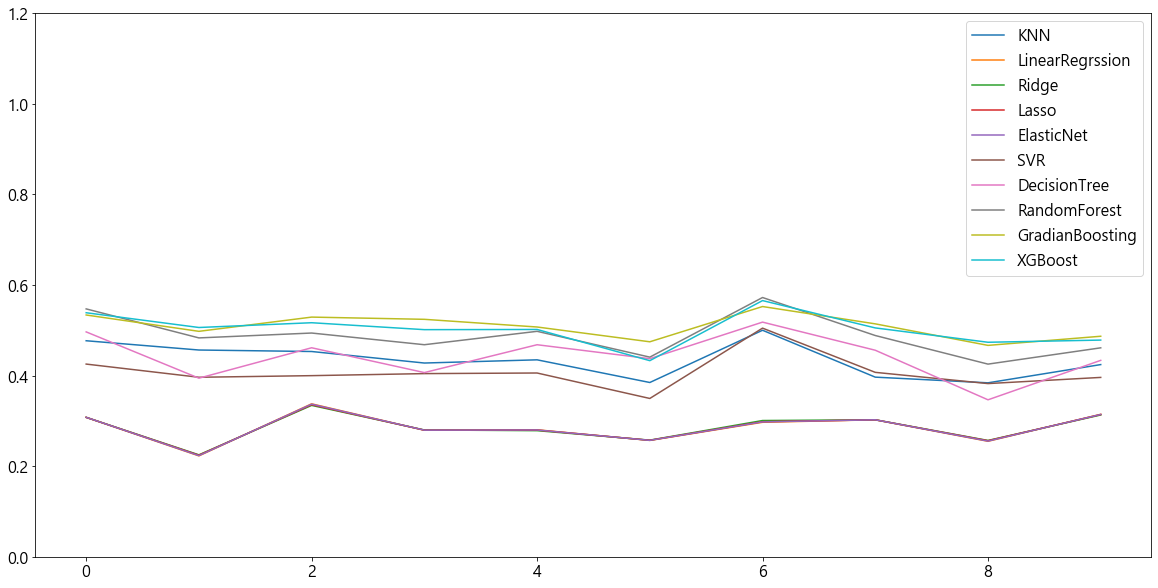

In [22]:
plt.plot(r1, label='KNN')
plt.plot(r2, label='LinearRegrssion')
plt.plot(r3, label='Ridge')
plt.plot(r4, label='Lasso')
plt.plot(r5, label='ElasticNet')
plt.plot(r6, label='SVR')
plt.plot(r7, label='DecisionTree')
plt.plot(r8, label='RandomForest')
plt.plot(r9, label='GradianBoosting')
plt.plot(r10, label='XGBoost')

plt.legend()

plt.ylim(0, 1.2)

plt.show()

In [23]:
# 모든 모델에 데이터를 학습시킨다.
best1.fit(x, y)
best2.fit(x, y)
best3.fit(x, y)
best4.fit(x, y)
best5.fit(x, y)
best6.fit(x, y)
best7.fit(x, y)
best8.fit(x, y)
best9.fit(x, y)
best10.fit(x, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=50, n_jobs=12, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, silent=True, subsample=1,
             tree_method='gpu_hist', validate_parameters=1, verbosity=0)

In [24]:
pred1 = best1.predict(x)
pred2 = best2.predict(x)
pred3 = best3.predict(x)
pred4 = best4.predict(x)
pred5 = best5.predict(x)
pred6 = best6.predict(x)
pred7 = best7.predict(x)
pred8 = best8.predict(x)
pred9 = best9.predict(x)
pred10 = best10.predict(x)


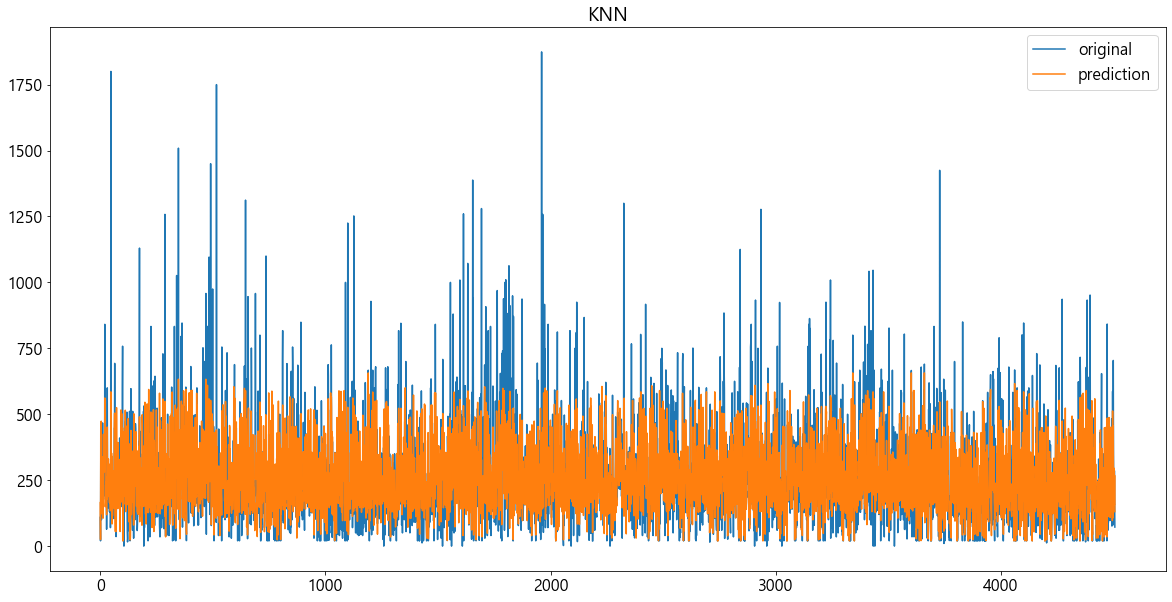

In [25]:
#KNN
plt.plot(y.values, label='original')
plt.plot(pred1, label='prediction')
plt.title('KNN')
plt.legend()
plt.show()


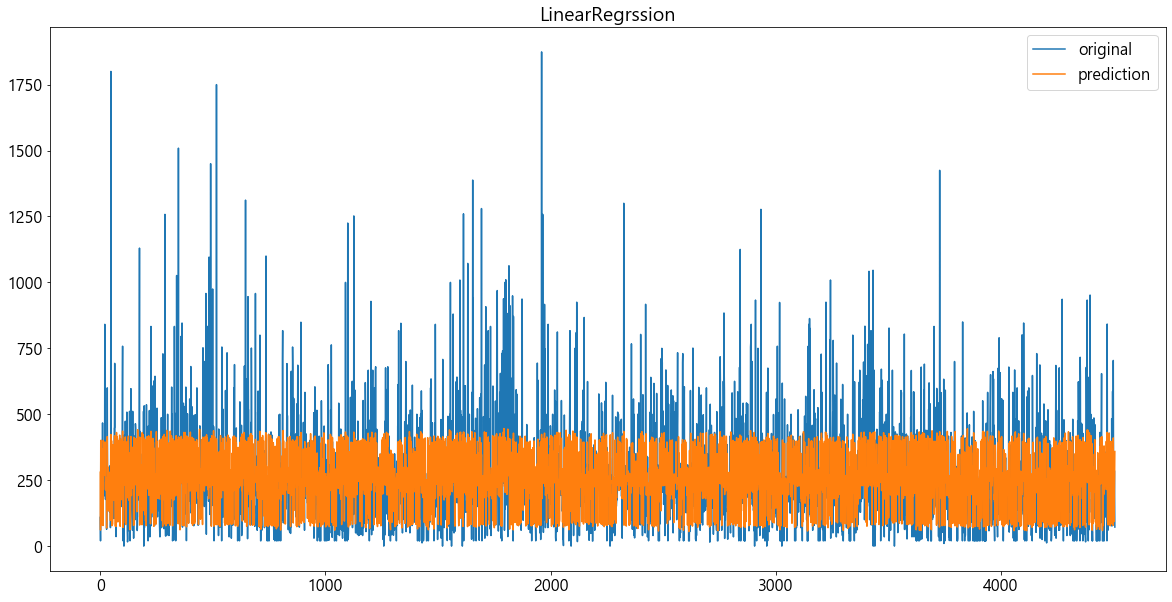

In [26]:
#LinearRegrssion
plt.plot(y.values, label='original')
plt.plot(pred2, label='prediction')
plt.title('LinearRegrssion')
plt.legend()
plt.show()


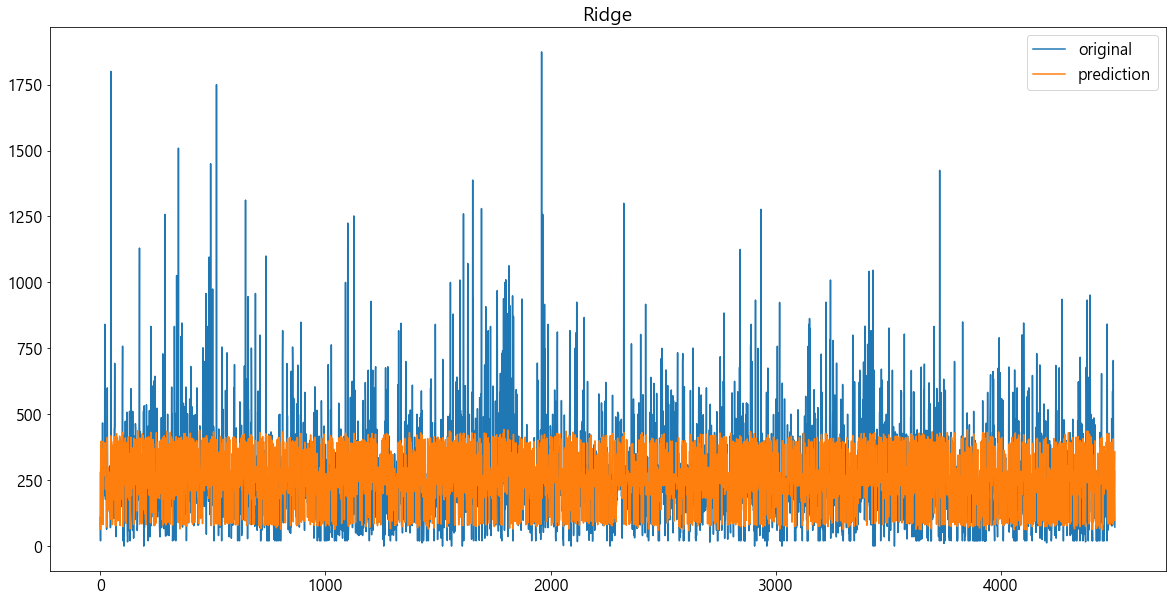

In [27]:
#Ridge
plt.plot(y.values, label='original')
plt.plot(pred3, label='prediction')
plt.title('Ridge')
plt.legend()
plt.show()


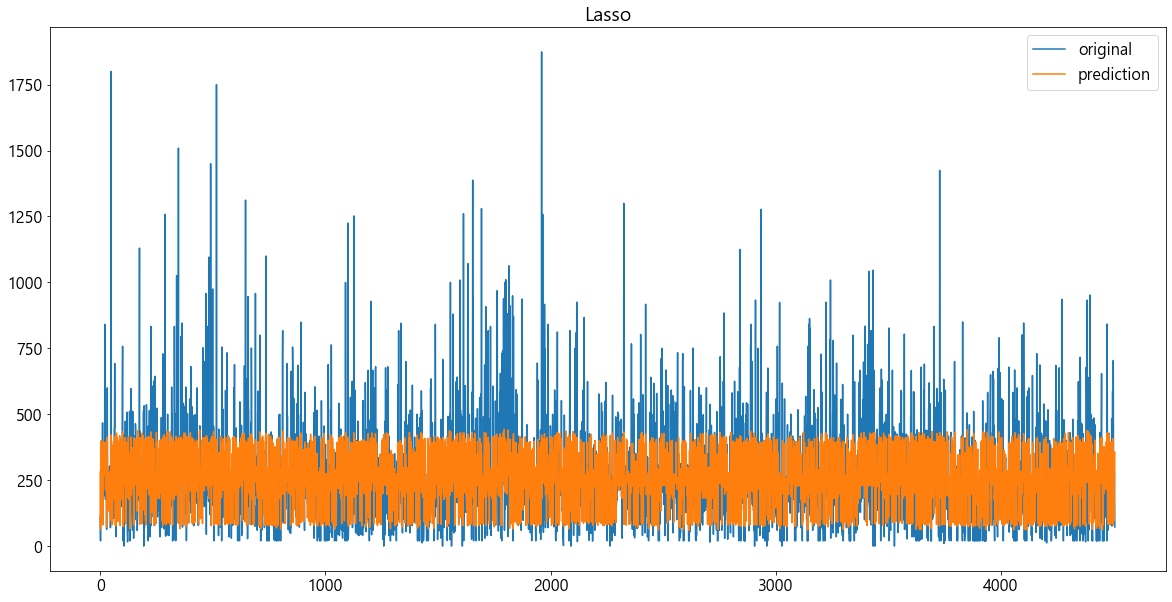

In [28]:
#Lasso
plt.plot(y.values, label='original')
plt.plot(pred4, label='prediction')
plt.title('Lasso')
plt.legend()
plt.show()


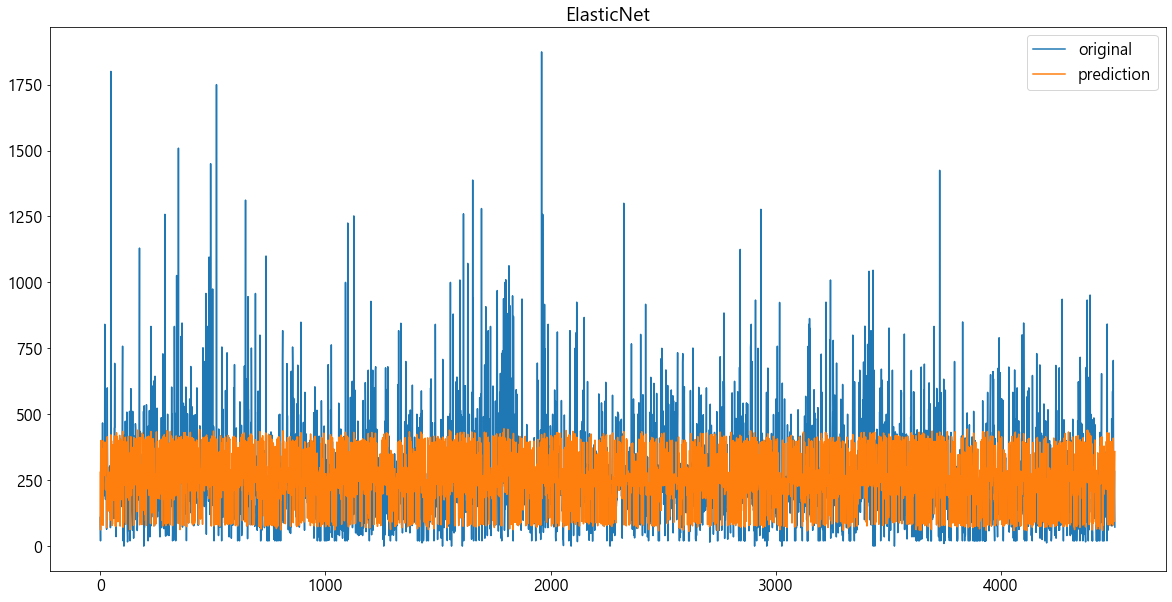

In [29]:
#ElasticNet
plt.plot(y.values, label='original')
plt.plot(pred5, label='prediction')
plt.title('ElasticNet')
plt.legend()
plt.show()


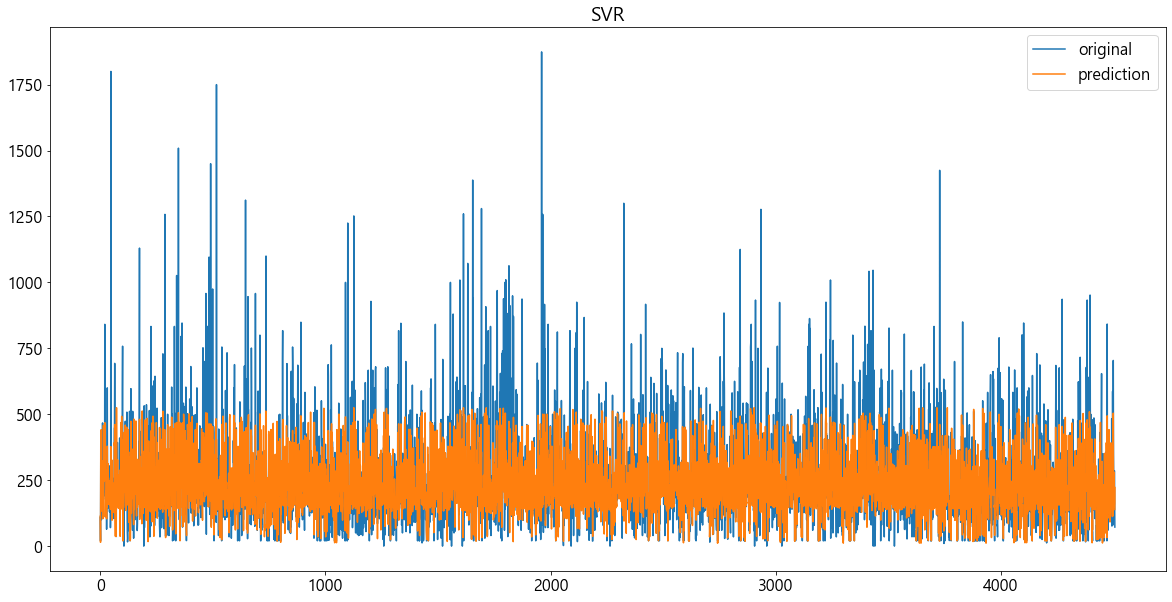

In [30]:
#SVR
plt.plot(y.values, label='original')
plt.plot(pred6, label='prediction')
plt.title('SVR')
plt.legend()
plt.show()


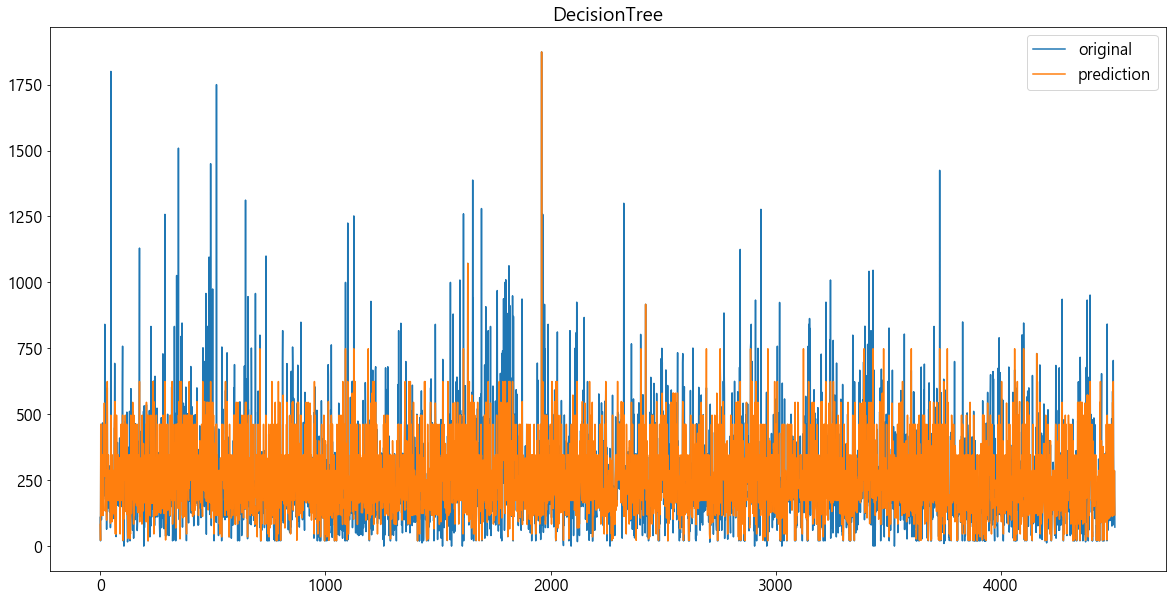

In [31]:
#DecistionTreeRegressor
plt.plot(y.values, label='original')
plt.plot(pred7, label='prediction')
plt.title('DecisionTree')
plt.legend()
plt.show()


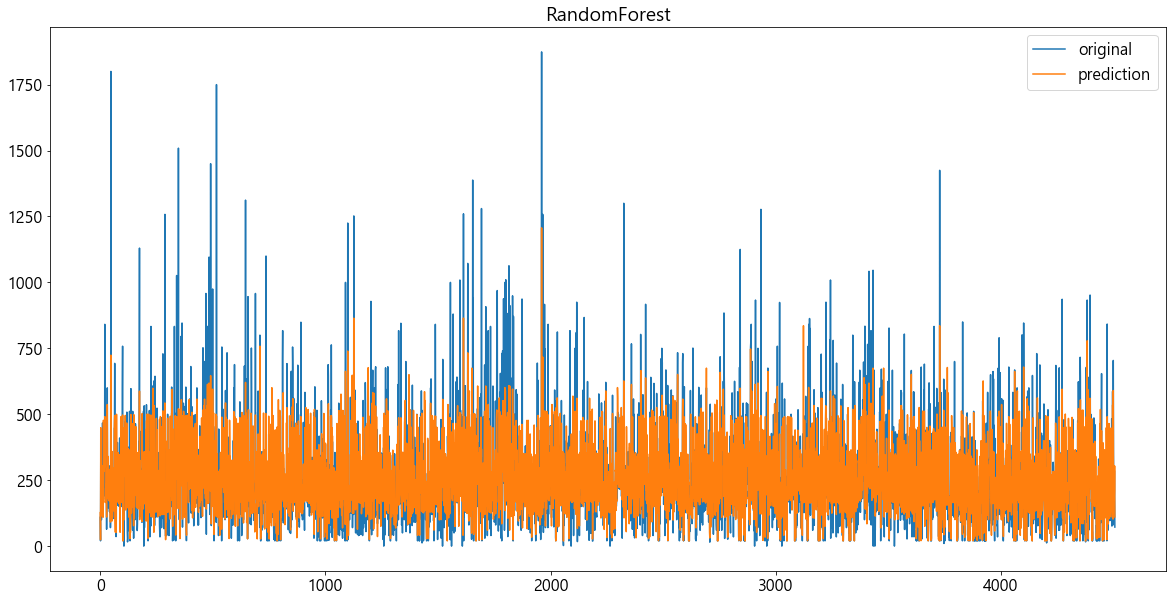

In [32]:
#RandomForest
plt.plot(y.values, label='original')
plt.plot(pred8, label='prediction')
plt.title('RandomForest')
plt.legend()
plt.show()


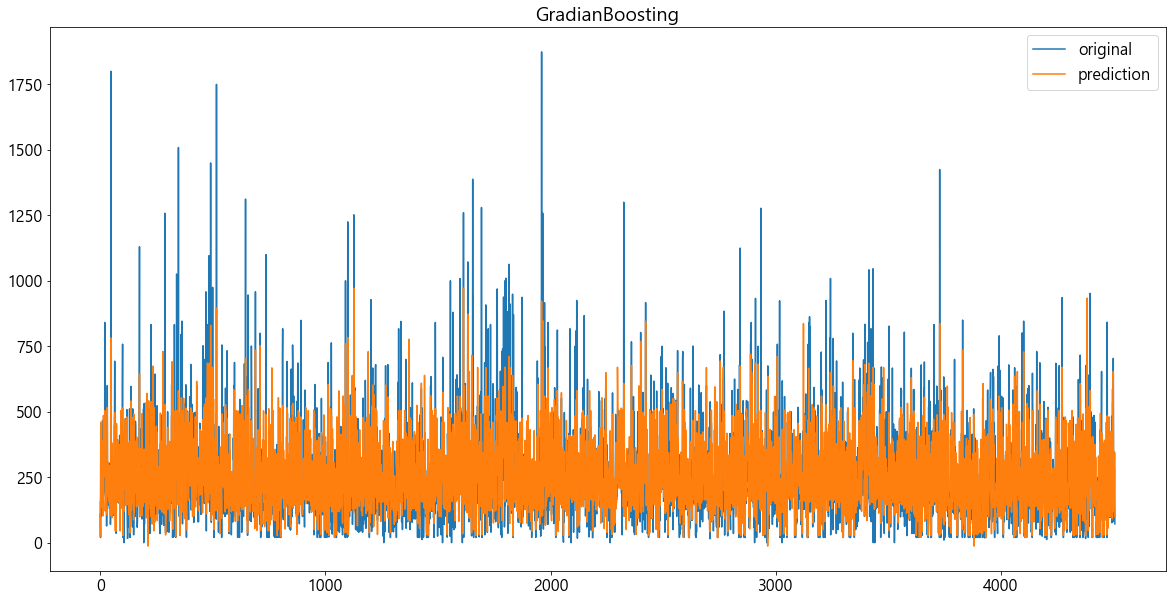

In [33]:
#GradianBoosting
plt.plot(y.values, label='original')
plt.plot(pred9, label='prediction')
plt.title('GradianBoosting')
plt.legend()
plt.show()

In [34]:
# test_df에서 평균 임금을 제거한다
x2 = test_df.drop('평균임금', axis=1)
x2

,성별,출생년도,직종
0,2,1936,9999.0
1,2,1945,9999.0
2,1,1948,9999.0
4,2,1923,9999.0
5,1,1962,530.0
...,...,...,...
15416,1,1967,874.0
15417,2,1967,952.0
15418,2,1992,9999.0
15420,2,1998,432.0


In [35]:
x2 = scaler1.transform(x2)
x2

array([[ 1.04749918, -2.43651818, 32.14964294],
       [ 1.04749918, -1.80143367, 32.14964294],
       [-0.95465468, -1.58973883, 32.14964294],
       ...,
       [ 1.04749918,  1.51511879, 32.14964294],
       [ 1.04749918,  1.93850846, -0.46048389],
       [-0.95465468,  2.1502033 , 32.14964294]])

In [36]:
pred100 = best9.predict(x2)
pred100

array([ 427.75062374,  446.80608705,  520.45742017, ...,  209.82802683,
       -253.75640379,  124.44970433])

In [37]:
df_all.loc[test_df.index, '평균임금'] = pred100
df_all

,성별,출생년도,직종,평균임금
0,2,1936,9999.0,427.750624
1,2,1945,9999.0,446.806087
2,1,1948,9999.0,520.457420
3,1,1942,762.0,108.900000
4,2,1923,9999.0,427.750624
...,...,...,...,...
15417,2,1967,952.0,131.604622
15418,2,1992,9999.0,209.828027
15419,1,1995,521.0,72.000000
15420,2,1998,432.0,-253.756404
